In [1]:
import os
import collections
import random

import torch
import numpy as np
import scipy.misc as m
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils import data
from torchvision import transforms

In [2]:
def decode_segmap(temp, plot=False):
        Sky = [128, 128, 128]
        Building = [128, 0, 0]
        Pole = [192, 192, 128]
        Road_marking = [255, 69, 0]
        Road = [128, 64, 128]
        Pavement = [60, 40, 222]
        Tree = [128, 128, 0]
        SignSymbol = [192, 128, 128]
        Fence = [64, 64, 128]
        Car = [64, 0, 128]
        Pedestrian = [64, 64, 0]
        Bicyclist = [0, 128, 192]
        Unlabelled = [0, 0, 0]

        label_colours = np.array([Sky, Building, Pole, Road_marking, Road, 
                                  Pavement, Tree, SignSymbol, Fence, Car, 
                                  Pedestrian, Bicyclist, Unlabelled])
        r = temp.copy()
        g = temp.copy()
        b = temp.copy()
        for l in range(0, 13):
            r[temp == l] = label_colours[l, 0]
            g[temp == l] = label_colours[l, 1]
            b[temp == l] = label_colours[l, 2]

        rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
        rgb[:, :, 0] = r
        rgb[:, :, 1] = g
        rgb[:, :, 2] = b
        if plot:
            plt.imshow(rgb)
            plt.show()
        else:
            return rgb

In [3]:
img = m.imread('../data/0001TP_006690_raw.png') 

In [4]:
img

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ..., 
       [ 4,  4,  4, ..., 11, 11, 11],
       [ 4,  4,  4, ..., 11, 11, 11],
       [ 4,  4,  4, ..., 11, 11, 11]], dtype=uint8)

In [5]:
img.shape

(360, 480)

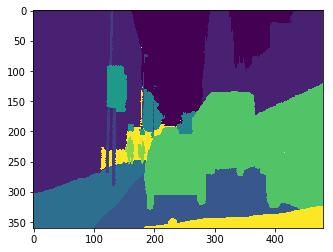

In [6]:
plt.imshow(img)

In [7]:
img_decode = decode_segmap(img)

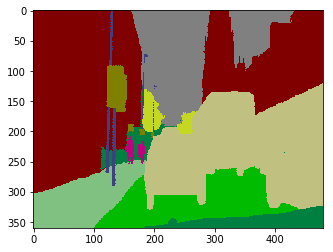

In [8]:
plt.imshow(img_decode[:, :, :])

In [9]:
height, width = img_decode.shape[:2]

In [10]:
img_r = img_decode[:, :, 0::3]
img_g = img_decode[:, :, 1::3]
img_b = img_decode[:, :, 2::3]

In [11]:
for row in range(height):
    for col in range(width):
        if np.array_equal(img_decode[row, col, :], [64, 0, 128]):
#             print('汽车 Car = [64, 0, 128]')
            pass
        elif np.array_equal(img_decode[row, col, :], [64, 64, 0]):
#             print('行人 Pedestrian = [64, 64, 0]')
            pass
        elif np.array_equal(img_decode[row, col, :], [0, 128, 192]):
#             print('自行车手 Bicyclist = [0, 128, 192]')
            pass
        elif np.array_equal(img_decode[row, col, :], [192, 128, 192]):
#             print('自行车手 Bicyclist = [192, 128, 192]')
            pass
        else:
            img_decode[row, col, :] = [0, 0, 0]

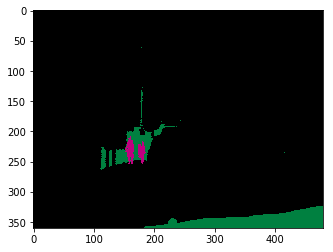

In [12]:
plt.imshow(img_decode)